In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *
from sklearn.cluster import KMeans
import graphviz
import re
from matplotlib.pyplot import figure
%matplotlib inline

In [279]:
file = pd.read_csv('Drone_delivery/drone_delivery_v1.csv',sep= ';',index_col = 'clientid')

In [280]:
fd = pd.DataFrame(file)
fd

,x,y
clientid,,
1,622.771572,164.857623
2,416.357298,630.193634
3,292.735020,567.333231
4,737.211288,166.225676
5,540.475375,682.912298
...,...,...
5952,832.857394,616.861410
5953,242.734500,490.325092
5954,108.690847,758.833921


<module 'matplotlib.pyplot' from 'D:\\DWNLOADS\\lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 640x480 with 0 Axes>

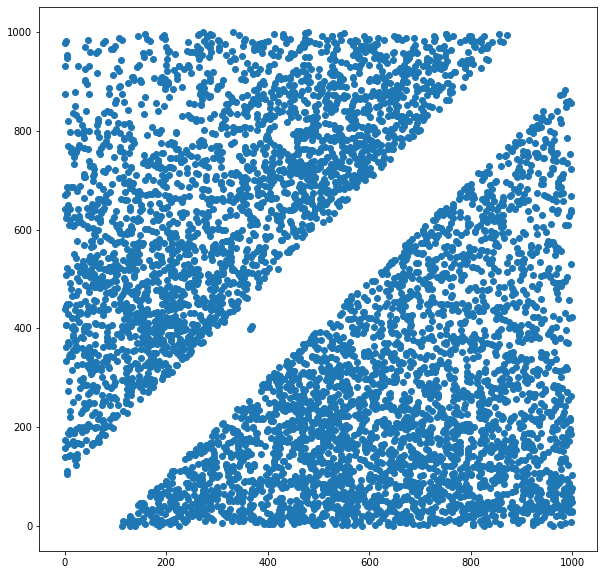

In [281]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
figure(figsize=(10,10))
plt.scatter(fd['x'], fd['y'])
plt

In [282]:
colnames = fd.columns.get_values()

# normalize all variables to mean=0, sd=1
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(fd))
df_scaled.head()

D:\DWNLOADS\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  """Entry point for launching an IPython kernel.


,0,1
0,0.420414,-0.908923
1,-0.341154,0.701123
2,-0.797259,0.483628
3,0.842640,-0.904189
4,0.116781,0.883528


In [283]:
n_clusters = 3
kmeans = KMeans(n_clusters, random_state=0).fit(df_scaled)

In [284]:
centroids = np.array(kmeans.cluster_centers_)

In [285]:
centroids

array([[ 0.71019427, -0.74770836],
       [ 0.20450145,  1.24679828],
       [-1.150633  , -0.09872088]])

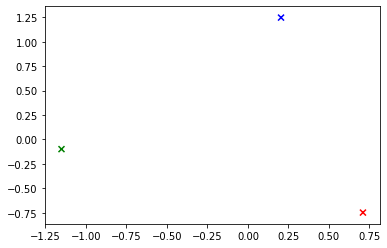

In [286]:
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color=['r','b','g'])

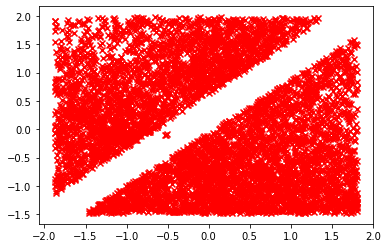

In [287]:
plt.scatter(df_scaled[0],df_scaled[1],marker = 'x', color=['r'])

In [290]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [291]:
kmeans.labels_

array([0, 1, 2, ..., 2, 0, 0])

In [292]:
mydict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

# Transform this dictionary into list (if you need a list as result)
mydict


{0: array([   0,    3,    5, ..., 5946, 5954, 5955], dtype=int64),
 1: array([   1,    4,    6, ..., 5945, 5947, 5951], dtype=int64),
 2: array([   2,    7,   10, ..., 5950, 5952, 5953], dtype=int64)}

In [293]:
kmeans.labels_

array([0, 1, 2, ..., 2, 0, 0])

In [294]:
ndf = pd.DataFrame(kmeans.labels_)

In [295]:
ndf

,0
0,0
1,1
2,2
3,0
4,1
...,...
5951,1
5952,2
5953,2
5954,0


In [296]:
df = fd

In [297]:
df.insert(2,'depot identifier',kmeans.labels_, True)

In [298]:
df

,x,y,depot identifier
clientid,,,
1,622.771572,164.857623,0
2,416.357298,630.193634,1
3,292.735020,567.333231,2
4,737.211288,166.225676,0
5,540.475375,682.912298,1
...,...,...,...
5952,832.857394,616.861410,1
5953,242.734500,490.325092,2
5954,108.690847,758.833921,2


In [300]:
print(df[0:10])

                   x           y  depot identifier
clientid                                          
1         622.771572  164.857623                 0
2         416.357298  630.193634                 1
3         292.735020  567.333231                 2
4         737.211288  166.225676                 0
5         540.475375  682.912298                 1
6         535.469492  318.439661                 0
7         640.380050  870.833221                 1
8         235.772075  359.048203                 2
9         481.896884  661.491838                 1
10        730.032789  312.177817                 0


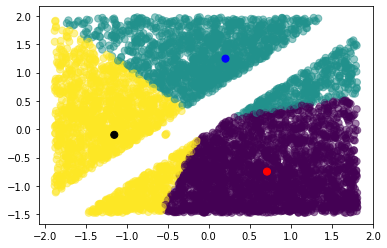

In [301]:
plt.scatter(df_scaled[0], df_scaled[1], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c=['red','blue','black'], s=50)

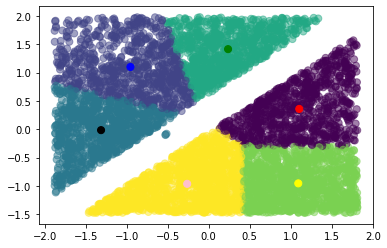

In [302]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(df_scaled)
centroids = np.array(kmeans.cluster_centers_)
plt.scatter(df_scaled[0], df_scaled[1], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c=['red','blue','black','green','yellow','pink'], s=50)

In [303]:
from sklearn.cluster import AgglomerativeClustering
ac = pd.read_csv('Drone_delivery/drone_delivery_v1.csv',sep= ';',index_col = 'clientid')

In [304]:
dac = pd.DataFrame(ac)

In [329]:
clustering = AgglomerativeClustering(n_clusters=5,linkage='average').fit(dac)

In [330]:
clustering.labels_

array([3, 0, 0, ..., 2, 1, 3], dtype=int64)

In [331]:
clustering.n_clusters

5

In [332]:
scaler = StandardScaler()
dac_scaled = pd.DataFrame(scaler.fit_transform(dac))
dac_scaled.head()

,0,1
0,0.420414,-0.908923
1,-0.341154,0.701123
2,-0.797259,0.483628
3,0.842640,-0.904189
4,0.116781,0.883528


<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)>

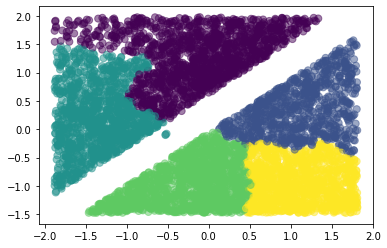

In [333]:
plt.scatter(dac_scaled[0],dac_scaled[1], c = clustering.labels_.astype(float), s=50, alpha=0.5)
plt.scatter